# Derivatives of Vector Expressions

In [1]:
import sympy as sp
# need to import the custom function to print vectors
from vector_expr_printing import vector_latex
# starting point of a vector expression is a vector symbol
from vector_expr import VectorSymbol, VectorExpr, VectorZero, VectorOne, Nabla
# also import symbolic vectors
from sympy.vector import CoordSys3D, Vector
# setting the printer to use latex_vector function
from sympy.interactive import printing
printing.init_printing(latex_printer=vector_latex)

In [2]:
v1 = VectorSymbol("v_1")
v2 = VectorSymbol("v_2")
nabla = Nabla()
zero = VectorZero()
one = VectorOne()
x, y = sp.symbols("x, y")

## Usage

To take derivatives of vector expressions we use the method `diff`:

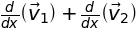

vector_expr.VecAdd

In [3]:
expr = v1 + v2 + one
d = expr.diff(x)
display(d, type(d))

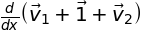

vector_expr.D

In [4]:
d = expr.diff(x, evaluate=False)
display(d, type(d))

As we can see, the unevaluated derivative is wrapped in the class `D`. Look at the code to understand the logic behind it. This also holds true for `VectorSymbol` derivatives:

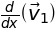

vector_expr.D

In [5]:
d = v1.diff(x)
display(d, type(d))

In [6]:
one.diff(x), zero.diff(x)

Note that derivatives of *del* operator are not supported:

In [7]:
nabla.diff(x)

NotImplementedError: Differentiation of nabla operator not implemented.

Also note that partial differentiation is not implemented:

In [8]:
expr.diff(x, y)

NotImplementedError: Vector differentiation with multiple variables not implemented

More examples. Cross product derivative:

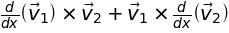

In [9]:
(v1 ^ v2).diff(x)

Dot product derivative:

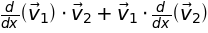

In [10]:
(v1 & v2).diff(x)

Derivative of products:

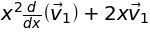

In [11]:
(v1 * x**2).diff(x)

Derivative of powers (remember that division is achieved with with `VecPow`):

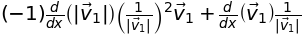

In [12]:
(v1 / v1.mag).diff(x)

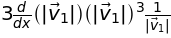

In [13]:
(v1.mag**3).diff(x)

A general example:

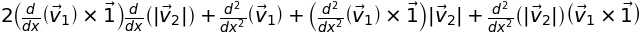

In [14]:
(v1 + (v1 ^ one) * v2.mag).diff(x, 2)

## Implementation Details

### The class `D`
As we have seen above, the unevaluated derivatives are wrapped by the class `D`. This is necessary because, even if the class `Derivative` has the property `is_Vector`, it doesn't *inherit* the value from its expression. So, if `v1` is a vector (which does have the property `is_Vector=True`), it follows that `sp.Derivative(v1, x)` will have the property `is_Vector=False`. This is bad because the next operations may require the the operand to be a vector (think about dot and cross product).

As of Sympy version 1.5.1, it is possible to set the property `is_Vector` of an instance of the class `Derivative` after its creation, however I believe it to be a bug because the same is not possible with the class `Add` or `Mul`, stating that `is_Vector` is a read-only property.

The solution to this problem comes by wrapping the unevaluated derivative with a class that we can actually control, setting its property `is_Vector` depending on the value of its expression.

### The class `VecAdd`
At this moment `VecAdd` doesn't inherith from `Add`, as such the arguments are not processed to simplify the expression. For example:

In [15]:
v1 + v2 - v1

Here it would be reasonable to expect `v1` to be eliminated. If `VecAdd` was a subclass of `Add`, that would be done automatically.

Unfortunately, if `VecAdd` would be a subclass of `Add`, when taking a n-th derivative it would return an instance of `Add`, where:
1. it is not possible to assign the property `is_Vector`;
2. without a reliable `is_Vector` value, it would introduce errors in further operations (think about dot and cross products).

This is why `VecAdd` isn't derived from `Add`. Hopefully this will change if I understand how to prevent the post-processing done after differentiation.